### Dual Annealing Example

In [142]:
import numpy as np
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt


In [143]:
def exp1(t, tau):
    return 1/tau*np.exp(-t/tau)

In [183]:
def objective(tau, t, y):
    mse = 1/y.size*np.sum((y - exp1(t, tau))**2)
    return mse

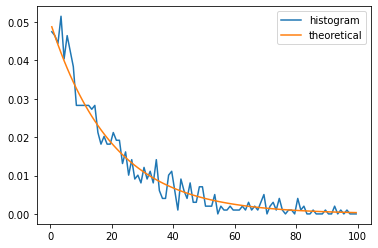

In [225]:
# sample some data from a single exponential decay
tau_theory = 20
data = np.random.exponential(scale=tau_theory, size=1000)
# bin the data
values, bins = np.histogram(data, bins=100, range=(0, 100), density=True)
centers = (bins[1:] + bins[:-1])/2
plt.plot(centers, values, label='histogram')
plt.plot(centers, exp1(centers, tau_theory), label='theoretical')
plt.legend()

Minimum at tau = 18.840000000000003


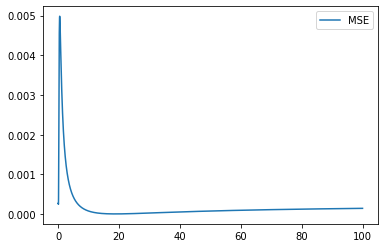

In [226]:
ls = []
tau_space = np.arange(0.01, 100, 0.01)
for tau_t in tau_space:
    ls.append(objective(tau_t, centers, values))
plt.plot(tau_space, ls, label='MSE')
plt.legend()
print('Minimum at tau =', tau_space[np.argmin(ls)])

In [227]:
# find the minimum with dual_annealing
lw = [0] 
up = [100] 
result = dual_annealing(objective, bounds=list(zip(lw, up)), args=(centers, values), maxiter=1000)
print(result)

     fun: 5.755179704806318e-06
 message: ['Maximum number of iteration reached']
    nfev: 2013
    nhev: 0
     nit: 1000
    njev: 6
  status: 0
 success: True
       x: array([18.84114814])


In [220]:
list(zip(lw, up))

[(0, 100)]

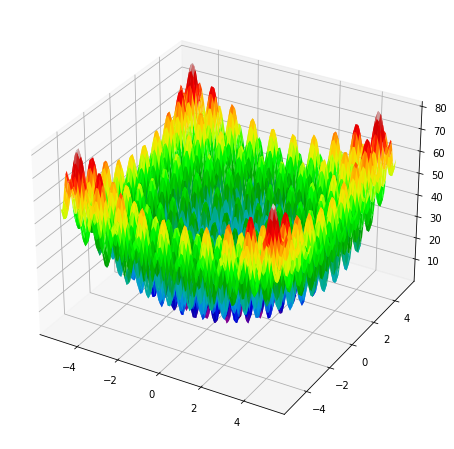

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure(figsize=(10, 8)) 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()

In [ ]:
# Find the global minumum of the rastrigin function
func = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)
lw = [-5.12] * 10
up = [5.12] * 10
ret = dual_annealing(func, bounds=list(zip(lw, up)))
ret.x